In [83]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from astropy.coordinates import SkyCoord

DP2_DIRECTORY = "/home/vibin/MyFolder/WorkDesk/DP2/"

#--------------------------------------------------------------------------------------------------------------------------
#To be put in cluster_breaker.py later

def range_wrapper(arr):

    '''Converts the range of (0 deg to 360 deg) to 
        (-180 deg to 180 deg) with 0 deg matching'''
        
    arr[np.where(arr > 180)] = arr[np.where(arr > 180)] - 360
    arr = -arr
    return arr

def plot_sky_map(ra, dec, labels = None, title = "Default title", mask = None, mark_size = 30):

    '''Give right ascension in array of decimal degrees (0 deg to 360 deg)
        and declination in array of decimal degrees (-90 deg to 90 deg)'''

    if (mask == None):
        mask = np.zeros_like(ra, dtype='int')
        mask = np.insert(mask, 0, 1)
        if (labels == None):
            labels = ['']
        else: labels = labels.split()

    ### Plots the lines marking the excluded area of the galactic plane
    gal_l = np.linspace(0, 360, 1000)
    gal_b = np.ones(1000) * 20.0
    gal_line_1 = SkyCoord(gal_l, gal_b, frame = 'galactic', unit = 'deg')
    gal_line_2 = SkyCoord(gal_l, -gal_b, frame = 'galactic', unit = 'deg')
    ### gal_line_equat is the galactic line in equatorial coordinates
    gal_line_equat_1 = gal_line_1.transform_to('icrs')   
    gal_line_equat_2 = gal_line_2.transform_to('icrs')
    gal_ra_1 = np.radians(range_wrapper(gal_line_equat_1.ra.degree))
    ###Sorting the array in order to do line plot
    i_sorted = np.argsort(gal_ra_1) 
    gal_ra_1 = gal_ra_1[i_sorted]
    gal_dec_1 = np.radians(gal_line_equat_1.dec.degree)[i_sorted]
    gal_ra_2 = np.radians(range_wrapper(gal_line_equat_2.ra.degree))
    i_sorted = np.argsort(gal_ra_2)
    gal_ra_2 = gal_ra_2[i_sorted]
    gal_dec_2 = np.radians(gal_line_equat_2.dec.degree)[i_sorted]
    ### dec -30 array is obtained
    dec_30_ra = np.radians(range_wrapper(np.linspace(0, 360, 1000)))
    dec_30_dec = np.radians(np.ones(1000) * -30.0)


    fig, ax = plt.subplots(figsize = (12, 7), subplot_kw={'projection': 'mollweide'})
    #ax = plt.subplot(111, projection = "mollweide")

    ### This plots the footprint
    ax.plot(gal_ra_1, gal_dec_1, color = 'black', linewidth = 1) 
    ax.plot(gal_ra_2, gal_dec_2, color = 'black', linewidth = 1)
    ax.plot(dec_30_ra, dec_30_dec, color = 'black', linewidth = 1)
    #-------------------------------------------------------------------------------------------
    ### Plotting the sources
    ra = np.radians(range_wrapper(ra)) 
    dec = np.radians(dec)
    marker = ['o','x']

    for n_source in range(mask[0]):
        source_pos = np.where(mask[1:] == n_source)
        ra_n, dec_n = ra[source_pos], dec[source_pos]

        ax.scatter(ra_n, dec_n, marker = marker[n_source], label = labels[n_source], s = mark_size)
    
    ax.set_title(title)
    ax.legend()
    ax.grid(True)

    ax.set_xticklabels(["10h", "8h", "6h", "4h", "2h", "0h", "22h", "20h", "18h", "16h", "14h"]);
    #plt.style.use(astropy_mpl_style)
    plt.show()

    return ax

def plot_redshift_dist(red, red_bins, title='Default title'):
    fig, ax = plt.subplots(figsize=(8,6))
    red_hist= ax.hist(red, red_bins, edgecolor='white')
    ax.set_xlabel('z')
    ax.set_ylabel('number of quasars')
    ax.set_title(title)

    return fig, ax


# Extracting Desi quasar data and visualization

In [62]:
desi_file_name = "desi_quasar_data.txt"
desi_file = open(DP2_DIRECTORY + "Data/" + desi_file_name, 'r')

data = pd.read_csv(desi_file, delimiter=' ')
desi_quasar_ra = np.array(data['RA'][:])
desi_quasar_dec = np.array(data['Dec'][:])
desi_quasar_red = np.array(data['za'][:])

#for line in desi_file:
#    print(line.split())

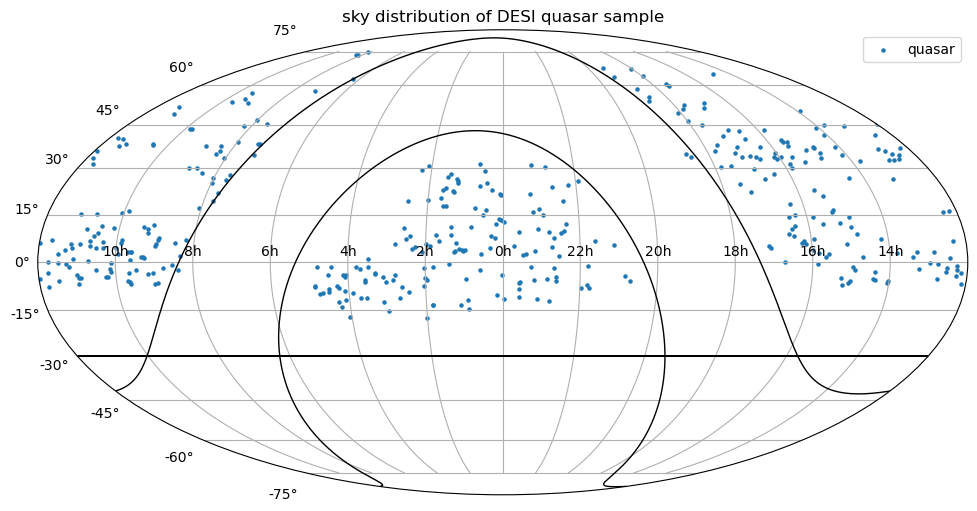

<MollweideAxes: title={'center': 'sky distribution of DESI quasar sample'}>

In [81]:
plot_sky_map(desi_quasar_ra, desi_quasar_dec, labels='quasar', title='sky distribution of DESI quasar sample', mark_size=5)

(<Figure size 800x600 with 1 Axes>,
 <Axes: title={'center': 'Redshift distribution of desi quasar sample'}, xlabel='z', ylabel='number of quasars'>)

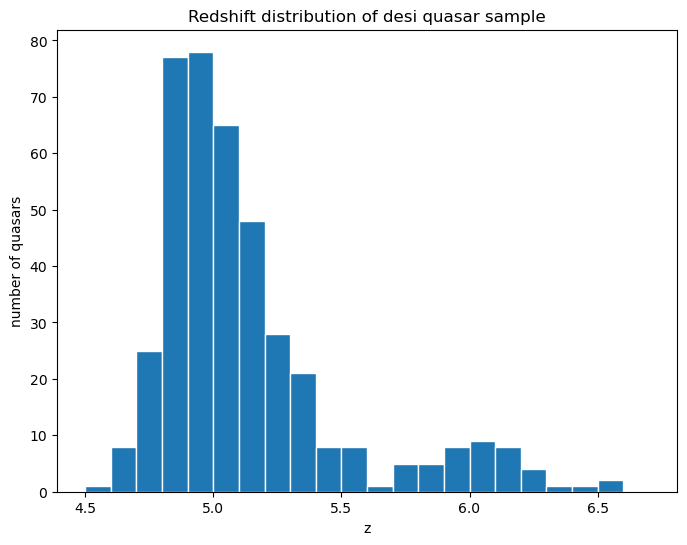

In [84]:
red_bins = np.arange(4.5, 6.8, 0.1)

plot_redshift_dist(desi_quasar_red, red_bins, title = 'Redshift distribution of desi quasar sample')

# Taking the subsample of quasars with z between 5.54 and 6.31, same as the PS1 sample

In [87]:
sub_loc = np.where((desi_quasar_red >= 5.54) & (desi_quasar_red <= 6.31))

desi_subsample_ra = desi_quasar_ra[sub_loc]
desi_subsample_dec = desi_quasar_dec[sub_loc]
desi_subsample_red = desi_quasar_red[sub_loc]

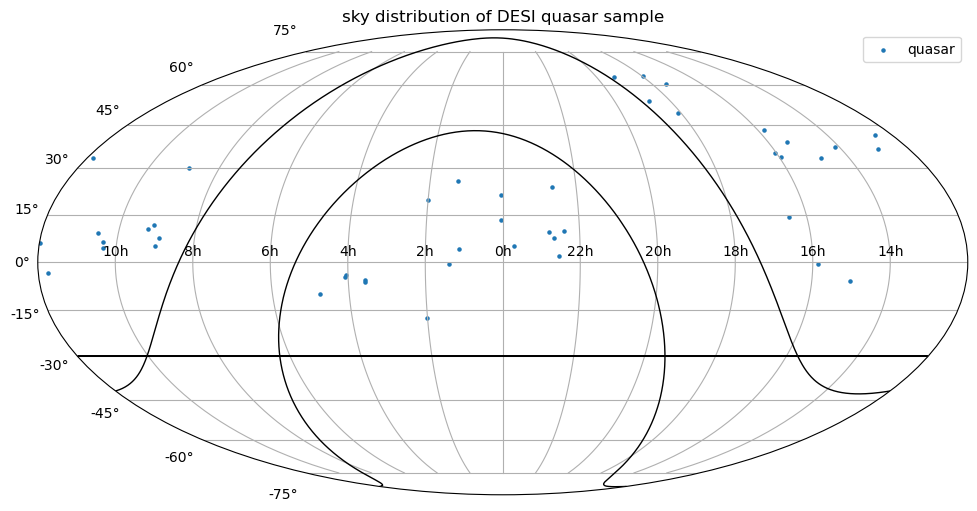

<MollweideAxes: title={'center': 'sky distribution of DESI quasar sample'}>

In [88]:
plot_sky_map(desi_subsample_ra, desi_subsample_dec, labels='quasar', title='sky distribution of DESI quasar sample', mark_size=5)